In [3]:
import numpy as np
import os
import shutil
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint

from matplotlib import pyplot as plt

from numpy.random import seed
import tensorflow as tf
from keras import backend as k
import os

ImportError: cannot import name 'regularizers' from 'keras.layers' (/home/alvaro/Escritorio/UNI/Clase/CompuBioInspirada/anaconda3/lib/python3.7/site-packages/keras/layers/__init__.py)

In [0]:
#!kill -9 -1

In [2]:
!wget https://github.com/vincent1bt/tesla-cars-dataset/archive/master.zip

--2018-11-27 18:40:22--  https://github.com/vincent1bt/tesla-cars-dataset/archive/master.zip
Resolving github.com (github.com)... 192.30.255.112, 192.30.255.113
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vincent1bt/tesla-cars-dataset/zip/master [following]
--2018-11-27 18:40:27--  https://codeload.github.com/vincent1bt/tesla-cars-dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.121, 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ] 188.48M  23.3MB/s    in 8.0s    

2018-11-27 18:40:36 (23.7 MB/s) - ‘master.zip’ saved [197632877]



In [0]:
!unzip -qq master.zip

In [0]:
!mkdir -p validation_images/tesla_model_3 && mkdir validation_images/tesla_model_s && mkdir validation_images/tesla_model_x

In [0]:
validation_set_size = 30

In [0]:
def move_images(from_path, to_path):
  files = os.listdir(from_path)
  folder_size = len(files)
  first_index = folder_size - validation_set_size
  files_to_move = files[first_index:]
  
  for file_name in files_to_move:
    source_file_name = from_path + file_name
    destination_file_name = to_path + file_name
    shutil.move(source_file_name, destination_file_name)

In [0]:
move_images("./tesla-cars-dataset-master/tesla-model-3/", "./validation_images/tesla_model_3/")
move_images("./tesla-cars-dataset-master/tesla-model-s/", "./validation_images/tesla_model_s/")
move_images("./tesla-cars-dataset-master/tesla-model-x/", "./validation_images/tesla_model_x/")

In [0]:
!mv tesla-cars-dataset-master training_images

In [0]:
!mv training_images/tesla-model-3 training_images/tesla_model_3
!mv training_images/tesla-model-s training_images/tesla_model_s
!mv training_images/tesla-model-x training_images/tesla_model_x

In [10]:
!ls training_images

tesla_model_3  tesla_model_s  tesla_model_x


In [0]:
img_height = 256
img_width = 256

def load_images(paths):
  X = []
  y = []
  
  for path in paths:
    images_paths = os.listdir(path)
    
    for image_path in images_paths:
      complete_path = path + image_path
      image = load_img(complete_path, target_size=(img_height, img_width))
      image_array = img_to_array(image)
      X.append(image_array)
      label = paths.index(path)
      y.append(label)
  
  return X, y

In [0]:
training_paths = ["training_images/tesla_model_3/", "training_images/tesla_model_s/", "training_images/tesla_model_x/"]
validation_paths = ["validation_images/tesla_model_3/", "validation_images/tesla_model_s/", "validation_images/tesla_model_x/"]

In [26]:
X_train, y_train = load_images(training_paths)
X_val, y_val = load_images(validation_paths)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
X_train = np.array(X_train)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [28]:
X_train.shape, X_val.shape

((356, 256, 256, 3), (90, 256, 256, 3))

In [29]:
y_train.shape, y_val.shape

((356,), (90,))

In [0]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [31]:
y_train.shape, y_val.shape

((356, 3), (90, 3))

## Data augmentation

In [0]:
datagen = ImageDataGenerator(
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        rescale = 1. / 255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

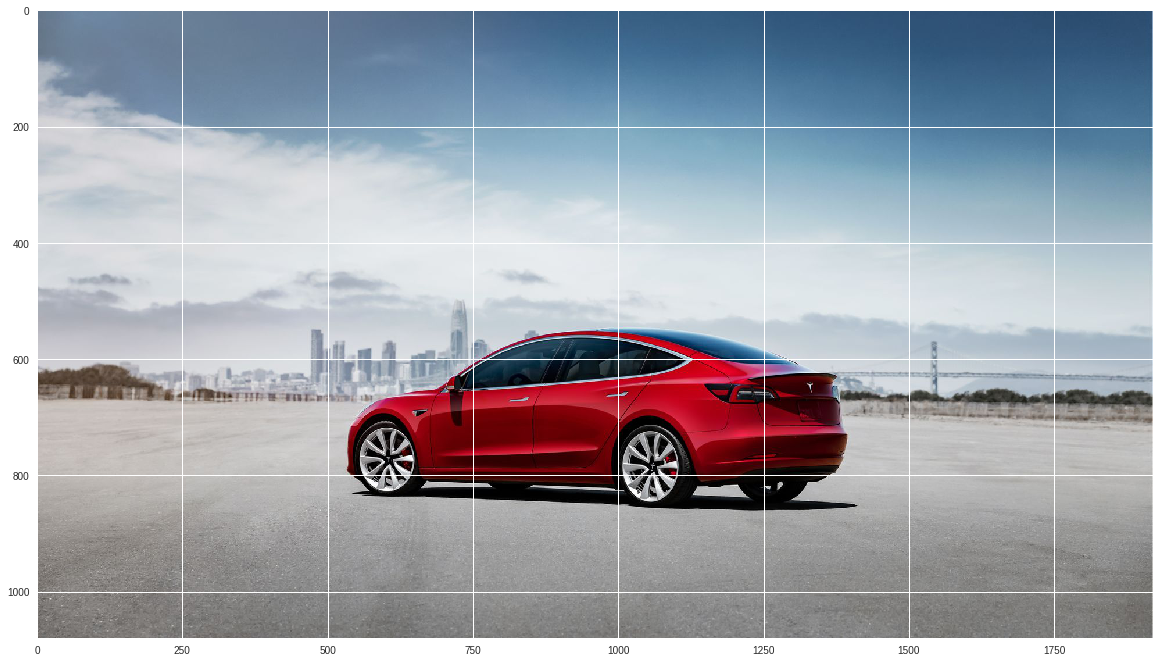

In [0]:
img = load_img("training_images/tesla_model_3/1-2.jpg")

plt.imshow(img)

In [0]:
# ! rm -rf preview

In [0]:
!mkdir preview

In [0]:
img = load_img("training_images/tesla_model_3/1-2.jpg", target_size=(256, 256))
img = img_to_array(img)
img = img.reshape((1,) + img.shape)

i = 0
for batch in datagen.flow(img, batch_size=1,
  save_to_dir='preview', save_prefix='car', save_format='jpeg'):
    i += 1
    if i > 20:
        break

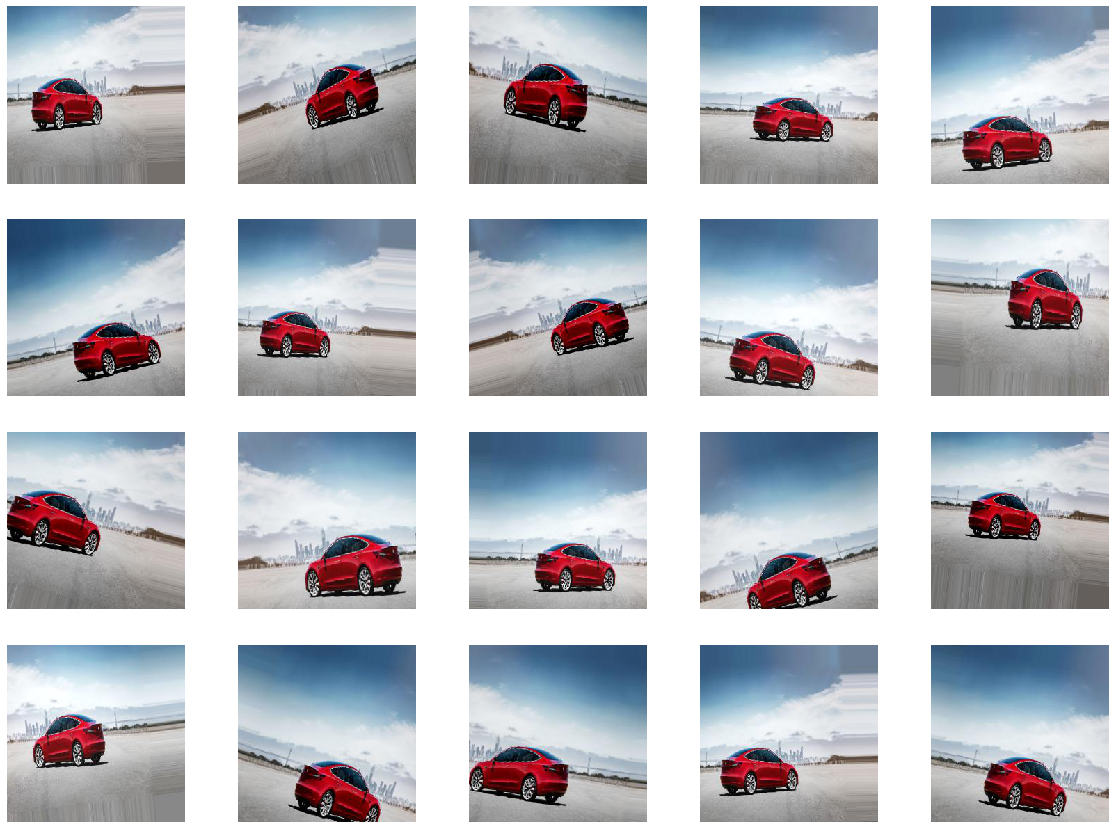

In [0]:
def load_preview_images():
  path = "./preview/"
  X = []
  
  images_paths = os.listdir(path)
    
  for image_path in images_paths:
    complete_path = path + image_path
    image = load_img(complete_path)
    X.append(image)
    
  return X

X_preview = load_preview_images()

def plot_images(images):    
  fig, axes = plt.subplots(4, 5)
  plt.rcParams["figure.figsize"] = (20, 15)
  
  for i, ax in enumerate(axes.flat):
      ax.imshow(images[i])
      
      ax.set_xticks([])
      ax.set_yticks([])
    
  plt.show()
  
plot_images(X_preview)

In [0]:
train_generator = ImageDataGenerator(
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        rescale = 1. / 255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

valid_generator = ImageDataGenerator(rescale = 1. / 255)

## Modelo

In [0]:
input_shape=(256, 256, 3)
kernel_size = 5

In [0]:
def plot_loss_and_accuracy(model_trained):
  accuracy = model_trained.history['acc']
  val_accuracy = model_trained.history['val_acc']
  loss = model_trained.history['loss']
  val_loss = model_trained.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'b', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
  plt.ylim(ymin=0)
  plt.ylim(ymax=1)
  plt.xlabel('Epochs ', fontsize=16)
  plt.ylabel('Accuracity', fontsize=16)
  plt.title('Training and validation accuracy', fontsize = 20)
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epochs ', fontsize=16)
  plt.ylabel('Loss', fontsize=16)
  plt.title('Training and validation loss', fontsize= 20)
  plt.legend()
  plt.show()

In [0]:
def create_model(X_train, X_val, y_train, y_val, learning_rate, epochs, batch_size, callbacks):
  model = Sequential()

  #Primera capa
  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid",
        strides=1, input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D())

  #Segunda capa
  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid", strides=1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D())

  #Tercera capa

  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid",
        strides=1,))
  model.add(Activation('relu'))
  model.add(MaxPooling2D())
  
  #Convertir los datos

  model.add(Flatten())

  #Cuarta capa
  model.add(Dense(500))
  model.add(Activation('relu'))

  #Clasificación 
  model.add(Dense(3))
  model.add(Activation('softmax'))
  
  AdamOptimizer = optimizers.Adam(lr=learning_rate)
  
  model.compile(optimizer=AdamOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  
  model_trained = model.fit_generator(train_generator.flow(X_train, y_train, batch_size=batch_size, shuffle = True), steps_per_epoch=len(X_train) // batch_size, epochs=epochs, verbose=1, callbacks=callbacks, validation_data=valid_generator.flow(X_val, y_val, shuffle = True), validation_steps=len(X_val) // batch_size)
  
  return model_trained, model

In [0]:
epochs = 250
batch_size = 32
learning_rate = 0.0003


callbacks = [ModelCheckpoint(filepath='weights.{epoch:02d}-val_acc:{val_acc:.2f}.h5', monitor='val_acc', save_best_only=True, verbose=1)]


In [0]:
model_trained, model = create_model(X_train, X_val, y_train, y_val, learning_rate, epochs, batch_size, callbacks)
plot_loss_and_accuracy(model_trained)
validation_acc = model_trained.history['val_acc'][-1] * 100
training_acc = model_trained.history['acc'][-1] * 100
print("Validation accuracy: {}%\nTraining Accuracy: {}%".format(validation_acc, training_acc))

## Cargar pesos

In [0]:
from google.colab import files

In [14]:
uploaded = files.upload()

Saving weights.184-val_acc_0.84.h5 to weights.184-val_acc_0.84.h5


In [15]:
!ls

master.zip   training_images	weights.184-val_acc_0.84.h5
sample_data  validation_images


In [0]:
def create_empty_model(learning_rate):
  model = Sequential()

  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid",
        strides=1, input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid", strides=1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid",
        strides=1,))
  model.add(Activation('relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())

  model.add(Dense(500))
  model.add(Activation('relu'))

  model.add(Dense(3))
  model.add(Activation('softmax'))
  
  AdamOptimizer = optimizers.Adam(lr=learning_rate)
  
  model.compile(optimizer=AdamOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [0]:
best_model = create_empty_model(learning_rate)

best_model.load_weights("./weights.184-val_acc_0.84.h5")

## Cargar imagenes externas

In [0]:
! wget https://static.urbantecno.com/2018/08/Tesla-Model-3-4-720x550.jpg

--2018-11-27 02:01:43--  https://static.urbantecno.com/2018/08/Tesla-Model-3-4-720x550.jpg
Resolving static.urbantecno.com (static.urbantecno.com)... 198.50.181.89
Connecting to static.urbantecno.com (static.urbantecno.com)|198.50.181.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65769 (64K) [image/jpeg]
Saving to: ‘Tesla-Model-3-4-720x550.jpg’

Tesla-Model-3-4-720 100%[===================>]  64.23K  --.-KB/s    in 0.08s   

2018-11-27 02:01:44 (849 KB/s) - ‘Tesla-Model-3-4-720x550.jpg’ saved [65769/65769]



In [0]:
! wget https://www.autonavigator.hu/wp-content/uploads/2014/01/109102_source-2.jpg

--2018-11-27 02:01:53--  https://www.autonavigator.hu/wp-content/uploads/2014/01/109102_source-2.jpg
Resolving www.autonavigator.hu (www.autonavigator.hu)... 194.33.69.21
Connecting to www.autonavigator.hu (www.autonavigator.hu)|194.33.69.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1028573 (1004K) [image/jpeg]
Saving to: ‘109102_source-2.jpg’

109102_source-2.jpg 100%[===================>]   1004K  1.19MB/s    in 0.8s    

2018-11-27 02:01:54 (1.19 MB/s) - ‘109102_source-2.jpg’ saved [1028573/1028573]



In [0]:
! wget https://upload.wikimedia.org/wikipedia/commons/9/92/2017_Tesla_Model_X_100D_Front.jpg

--2018-11-27 02:01:56--  https://upload.wikimedia.org/wikipedia/commons/9/92/2017_Tesla_Model_X_100D_Front.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4768386 (4.5M) [image/jpeg]
Saving to: ‘2017_Tesla_Model_X_100D_Front.jpg’

2017_Tesla_Model_X_ 100%[===================>]   4.55M  8.62MB/s    in 0.5s    

2018-11-27 02:01:56 (8.62 MB/s) - ‘2017_Tesla_Model_X_100D_Front.jpg’ saved [4768386/4768386]



In [0]:
X_test = []

image = load_img("./Tesla-Model-3-4-720x550.jpg", target_size=(img_height, img_width))
image_array = img_to_array(image)
X_test.append(image_array)

image = load_img("./109102_source-2.jpg", target_size=(img_height, img_width))
image_array = img_to_array(image)
X_test.append(image_array)

image = load_img("./2017_Tesla_Model_X_100D_Front.jpg", target_size=(img_height, img_width))
image_array = img_to_array(image)
X_test.append(image_array)

X_test = np.array(X_test)

In [0]:
X_test = X_test.astype('float32') / 255

In [0]:
X_test.shape

(3, 256, 256, 3)

In [0]:
y_pred = best_model.predict(X_test, batch_size=None, verbose=1, steps=None)

3/3 [==============================] - 3s 872ms/step


In [0]:
y_true = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [0]:
np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1)

(array([0, 1, 2]), array([1, 1, 2]))

In [0]:
y_pred

array([[7.0620916e-07, 9.4366521e-01, 5.6334153e-02],
       [3.1176634e-05, 9.9996805e-01, 6.8649950e-07],
       [7.2935806e-04, 1.1818808e-03, 9.9808878e-01]], dtype=float32)

In [0]:
img_height = 256
img_width = 256

def load_complete_images(paths):
  X = []
  y = []
  
  for path in paths:
    images_paths = os.listdir(path)
    
    for image_path in images_paths:
      complete_path = path + image_path
      image = load_img(complete_path, target_size=(img_height, img_width))
      X.append(image)
      label = paths.index(path)
      y.append(label)
  
  return X, y

## Cargar imagenes

In [25]:

X_complete, y_complete = load_complete_images(training_paths)
X_val_complete, y_val_complete = load_complete_images(validation_paths)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


## Reescalar X_train

In [0]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

## Predicciones

In [33]:
y_train_pred = best_model.predict(X_train, batch_size=None, verbose=1, steps=None)
y_val_pred = best_model.predict(X_val, batch_size=None, verbose=1, steps=None)

90/90 [==============================] - 1s 9ms/step


In [0]:
y_train_pred_max = np.argmax(y_train_pred, axis=1)
y_val_pred_max = np.argmax(y_val_pred, axis=1)

## Clases reales

In [0]:
y_train_true = np.argmax(y_train, axis=1)
y_val_true = np.argmax(y_val, axis=1)

In [35]:
y_train_true.shape, y_val_true.shape

((356,), (90,))

## Imprimir imagenes y sus clases

In [0]:
classes_array = ['3', 's', 'x']

def plot_images(images, cls_true, cls_pred):    
    fig, axes = plt.subplots(8, 8)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.rcParams["figure.figsize"] = (20, 20)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        
        true_class = classes_array[int(cls_true[i])]
        pred_class = classes_array[int(cls_pred[i])]

        xlabel = "True: {0}, Pred: {1}".format(true_class, pred_class)

        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

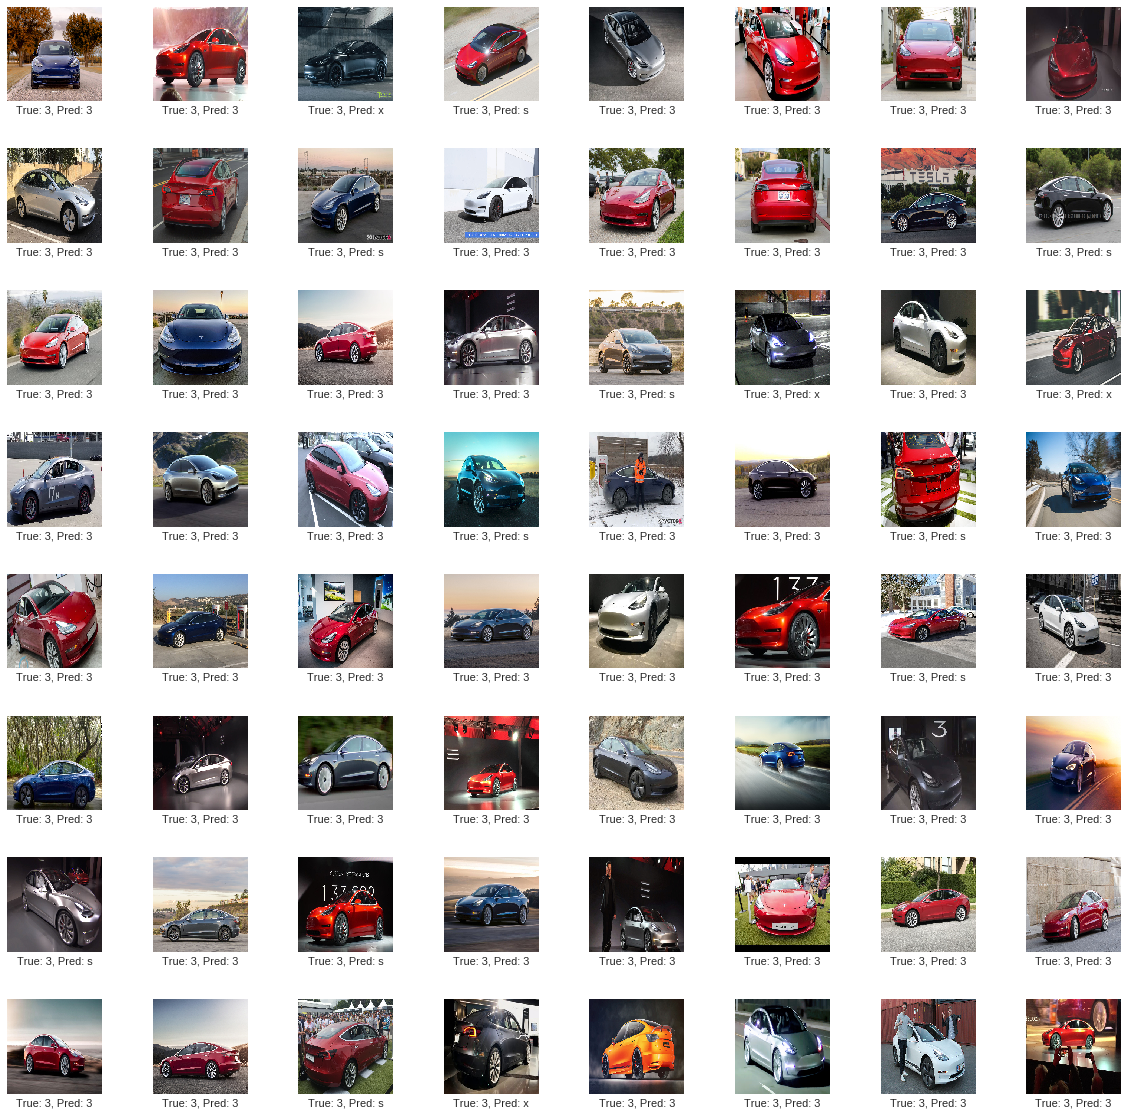

In [48]:
images = X_complete[0:64]
cls_true = y_train_true[0:64]
cls_pred = y_train_pred_max[0:64]
plot_images(images, cls_true, cls_pred)

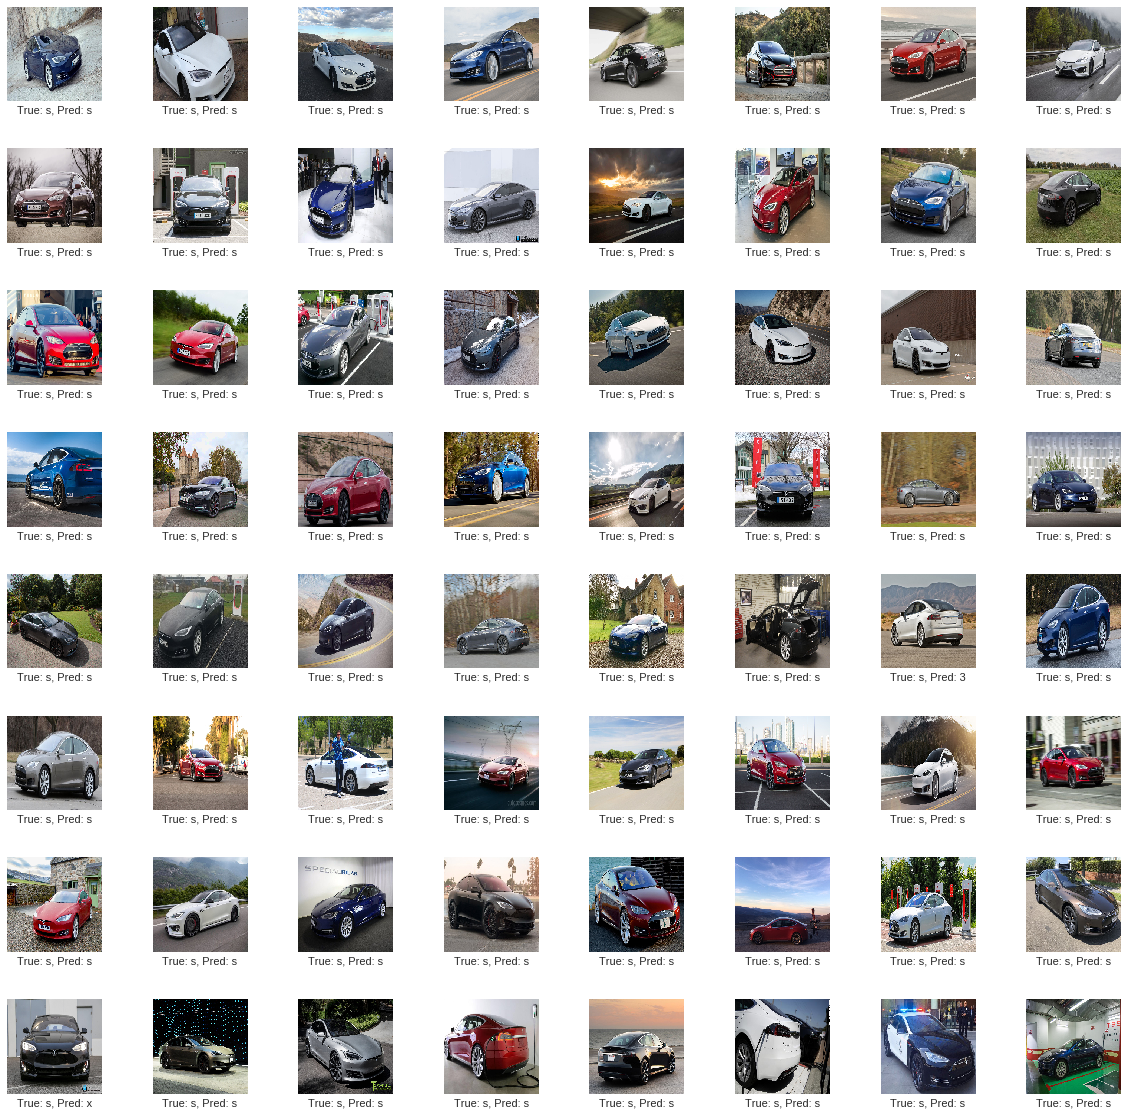

In [50]:
images = X_complete[150:214]
cls_true = y_train_true[150:214]
cls_pred = y_train_pred_max[150:214]
plot_images(images, cls_true, cls_pred)

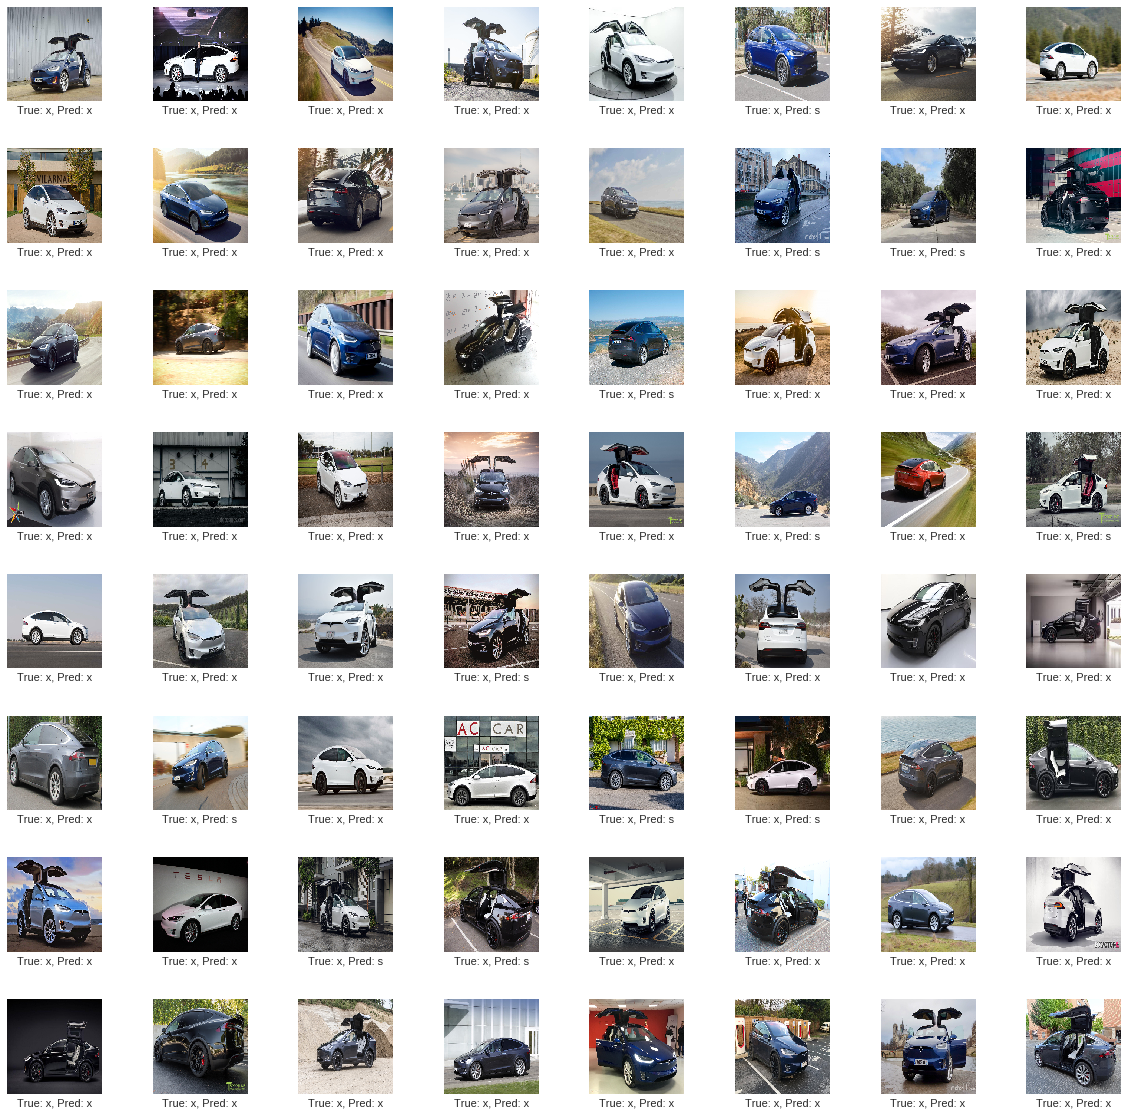

In [51]:
images = X_complete[291:356]
cls_true = y_train_true[291:356]
cls_pred = y_train_pred_max[291:356]
plot_images(images, cls_true, cls_pred)

## Visualizar kernels

In [0]:
print(best_model.layers[0].get_weights()[0].shape)

(5, 5, 3, 64)


In [0]:
print(print(best_model.layers[3].get_weights()[0].shape))

(5, 5, 64, 64)
None


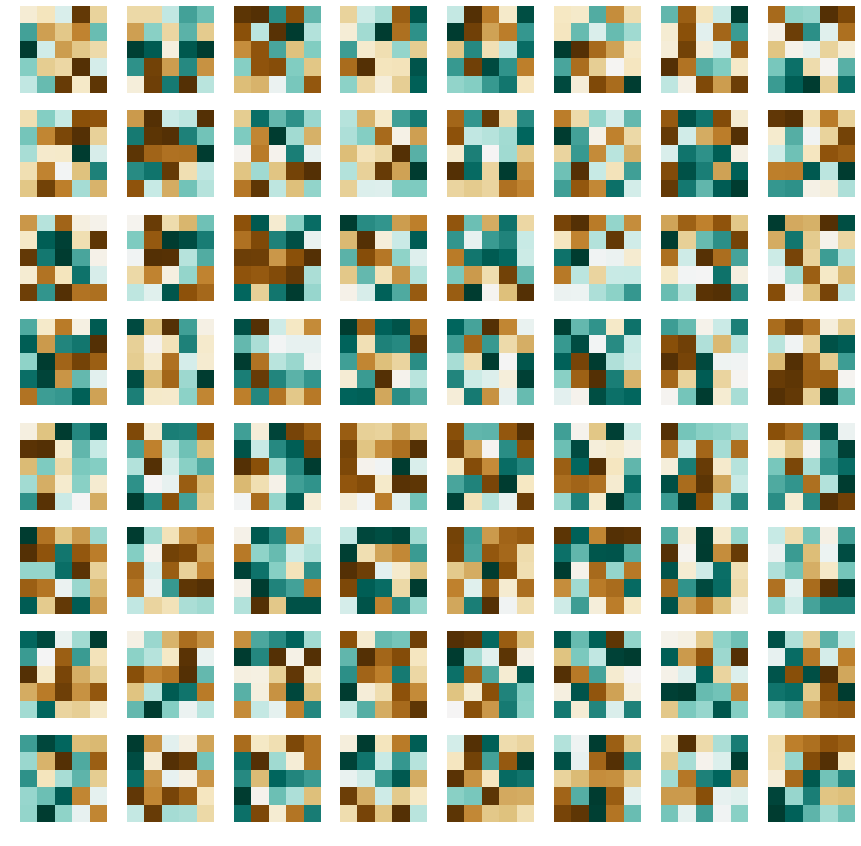

In [0]:
total_kernel = 64
conv1_kernels = best_model.layers[0].get_weights()[0] # 0 para obtener weights, 1 para obtener bias
plt.rcParams["figure.figsize"] = (15, 15)

for i in range(total_kernel):
  plt.subplot(8, 8, i + 1)
  plt.imshow(conv1_kernels[:, :, 0, i], cmap='BrBG')
  plt.axis('off')

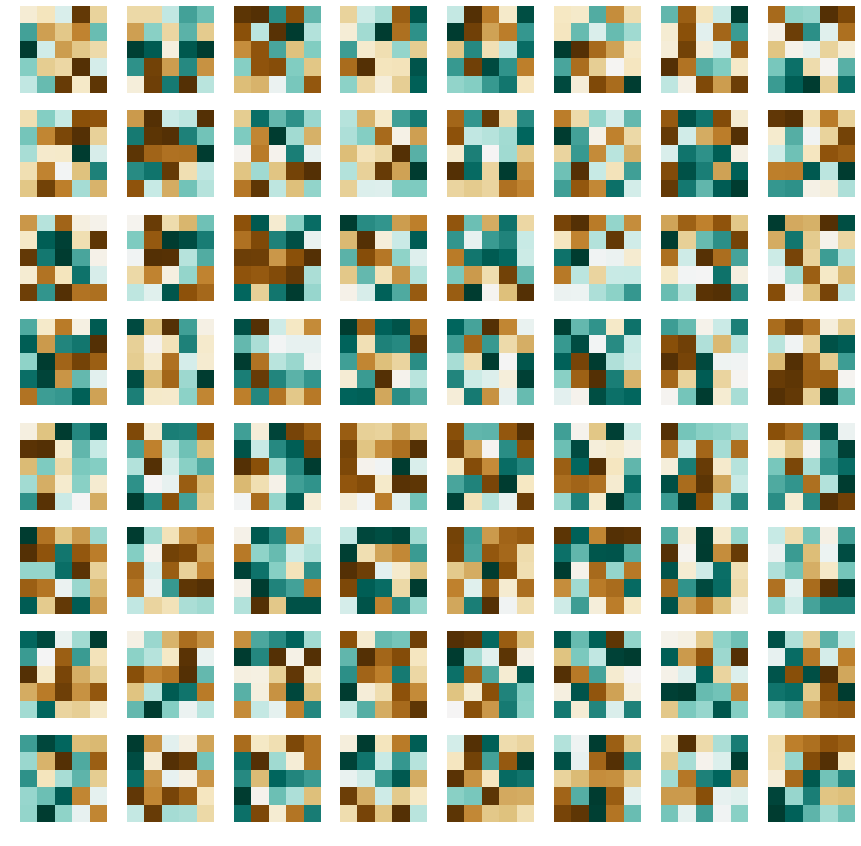

In [0]:
conv2_kernels = best_model.layers[3].get_weights()[0] # 0 para obtener weights, 1 para obtener bias
plt.rcParams["figure.figsize"] = (15, 15)

for i in range(total_kernel):
  plt.subplot(8, 8, i + 1)
  plt.imshow(conv1_kernels[:, :, 0, i], cmap='BrBG')
  plt.axis('off')